# Import Necessary Library

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

# Import data

In [39]:
# DataFrame for movie rating
df_ratings =pd.read_csv("data1/ratings.csv")
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [40]:
# DataFrame for rated movies
df_movies =pd.read_csv("data1/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Since the two dataFrame shares the same movieid,we will use `pd.merge()` function to merge the two dataFrame

In [41]:
movie_data=pd.merge(df_ratings,df_movies,on="movieId")
movie_data

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


The dataFrame above has `userId`,`movieId`,`rating`,`timestamp`,`title` as well as `genre`,which will help us in building our recommender system. 
NB: Our next step will be to use `groupby` function to group the movie by title and then get the average(mean) rating of each movie

In [91]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False)


title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Name: rating, Length: 9719, dtype: float64

In [92]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

From above,we can see that even a movie that has a single rating of 5 stars can make it to the top,so we need to consider those movies with higher number of people rating it

* let us create a dataframe that contains both `rating` and `rating_avg_counts` per given movie

In [93]:
rating_avg_counts=pd.DataFrame(movie_data.groupby("title")["rating"].mean())
rating_avg_counts.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


 Next thing is to add `rating_counts` to our rating_avg_counts dataFrame

In [94]:
rating_avg_counts["rating_counts"] =pd.DataFrame(movie_data.groupby("title")["rating"].count())

In [95]:
rating_avg_counts.head()

,rating,rating_counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


From above ,we can now see the average rating of each movie and total number of people that rated it.

**Let us create histogram of `rating_counts`  from the DataFrame above


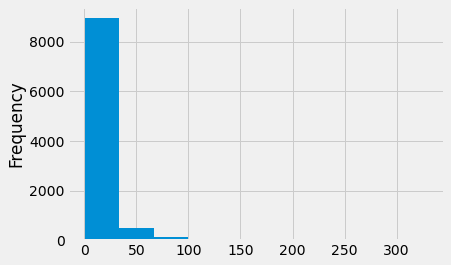

In [61]:

rating_avg_counts["rating_counts"].plot(kind="hist");

We can see from the histogram above that majority of the movie received less than 50 ratings and no movie rated more than 100

**We want to plot a histogram of average rating

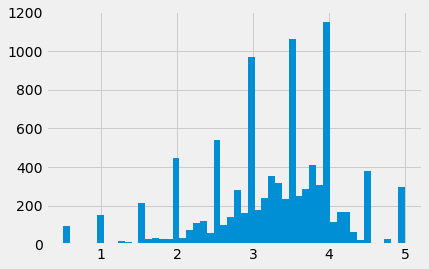

In [63]:
plt.hist(
    rating_avg_counts["rating"],
    bins=50
);

From histogram above,we can see that average rating of most movie is 4 and it can also be deduced that there are some outliers in the dataset

# Finding Similarity between Movies in the DataFrame
* At this stage,we create a DataFrame where the `columns` represent the rated movies, `index` will stand for `userId` and the `values` are the `ratings`

    * We will use `pd.pivot_table()` functions 

In [67]:
movie_dataPivot =pd.pivot_table(movie_data,columns="title",values="rating",index="userId")
movie_dataPivot

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


Numerous NaN in the table above is because many of the featured movies did not receive any rating at all

* As we can see from DataFrame above, we can see that each columns contains all the ratings for each movie. Let us consider rating for `Forrest Gump (1994)` which has highest rating counts

In [68]:
forrest_gup_ratings =movie_dataPivot["Forrest Gump (1994)"]
forrest_gup_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

# Now we will extract movies similar to `Forrest Gump (1994)` in terms of ratings.
* We can see the relationships between `Forrest Gump (1994)` and other movies by using `corrwith()` functions

In [73]:
# Generating a correlation btw forrest gump(1994) and other movies.FG94==Forrest Gump (1994)
sim_movie_to_FG94=movie_dataPivot.corrwith(forrest_gup_ratings)

C:\Users\ISAAC\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ISAAC\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [78]:
sim_movie_to_FG94

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              0.011189
xXx (2002)                                   0.306817
xXx: State of the Union (2005)               0.383482
¡Three Amigos! (1986)                        0.449692
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

# We will create a DataFrame containing `title` and the correspondent `correlation` of other movies to `Forrest Gump (1994)`.
* We will also drop `NaN`

In [80]:
movieSimilar_to_gump =pd.DataFrame(sim_movie_to_FG94,columns=['correlation'])
movieSimilar_to_gump.head()

,correlation
title,
'71 (2014),NaN
'Hellboy': The Seeds of Creation (2004),NaN
'Round Midnight (1986),NaN
'Salem's Lot (2004),NaN
'Til There Was You (1997),NaN


In [81]:
movieSimilar_to_gump.dropna(inplace=True)

In [82]:
movieSimilar_to_gump.head()

,correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


# Our next step is to sort the movie correlation in descending order so as to have the movie with highest correlation at the top

In [88]:
movieSimilar_to_gump.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Lost & Found (1999),1.0
"Cercle Rouge, Le (Red Circle, The) (1970)",1.0
Play Time (a.k.a. Playtime) (1967),1.0
Killers (2010),1.0
Playing God (1997),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0
"Century of the Self, The (2002)",1.0
Welcome to the Jungle (2013),1.0


# Using Correlation of movies and `Forrest Gump (1994)` as the similarity metrics is not the best bescause someone can watch just `Forrest Gump (1994)` and 
watch one other movie and give it a rating of 5 each 
* What we will do to correct the short Fall is :
    -retrieve only those movies with at least 50 ratings,we will do that by adding the `rating_counts` column  in `rating_av_counts`  DataFrame to our `movieSimilar_to_gump`

In [96]:
movieSimilar_to_gump =movieSimilar_to_gump.join(rating_avg_counts["rating_counts"])
movieSimilar_to_gump.head()

,correlation,rating_counts
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


from above ,we can see that `10 Cent Pistop` has a negative correlation with `Forrest Gump (1994)` and total rating of two. We cannot
say it is similar to our target movie. Let us only recommend movie that has more than 50 ratings.


In [97]:
movieSimilar_to_gump =movieSimilar_to_gump[movieSimilar_to_gump["rating_counts"]>50]
movieSimilar_to_gump.head()

,correlation,rating_counts
title,,
10 Things I Hate About You (1999),0.088009,54
12 Angry Men (1957),0.267417,57
2001: A Space Odyssey (1968),0.191558,109
28 Days Later (2002),-0.070858,58
300 (2007),0.321523,80


From above, we can see that `28 Days Later (2002)` has negative correlaation with `Forrest Gump (1994)` and still come top 4 movies. This tells us that we can keep improving our engine so as to get the very best

Thank You!!